<a href="https://colab.research.google.com/github/justhussh/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 3

Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ikuti alur autorisasinya hingga muncul pesan: “Mounted at /content/drive”.

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:


Mengubah Tingkat Kecerahan Citra
Masukkan nilai kecerahan : 100


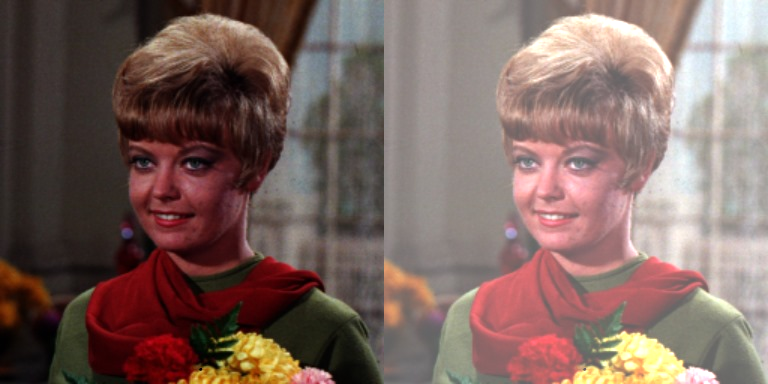

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('Mengubah Tingkat Kecerahan Citra')
print ('================================')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/woman.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan menampilkan text
field untuk memasukkan konstanta nilai brightness yang diinginkan, dan akan disimpan pada
variabel brightness. Kemudian ditentukan citra pada drive yang akan diolah dan ditampung di
variabel original. Tahap selanjutnya adalah mengakses pixel citra masukan dengan 3 perulangan.
Perulangan pertama dilakukan pada shape[0] untuk tinggi citra, perulangan kedua dilakukan pada
shape[1] untuk lebar citra, dan perulangan ketiga dilakukan pada shape[2] yang merupakan
channel warna pada citra. Setelah melakukan 3 perulangan, dilakukan transformasi linier
brightness dengan cara menambahkan nilai brightness pada citra masukan. Contoh hasil dari
kode program di atas adalah sebagai berikut.

## **Tugas Praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

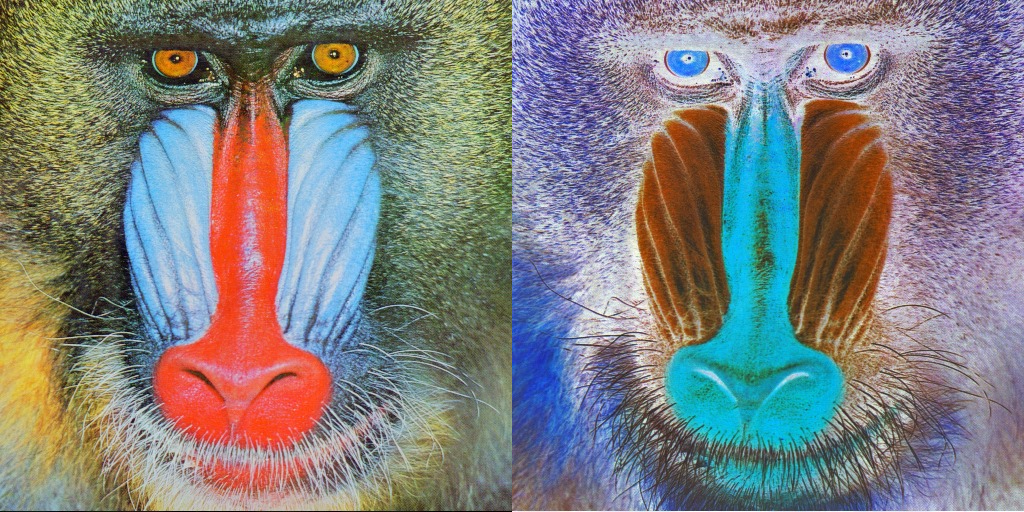

In [7]:
monki = cv.imread('/content/drive/MyDrive/PCVK/images/baboon.jpg')
height, width, channels = monki.shape
inverted_monki = np.copy(monki)

for i in range(channels):
    inverted_monki[:, :, i] = 255 - inverted_monki[:, :, i]

frame1 = cv.hconcat((monki, inverted_monki))
cv2_imshow(frame1)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

mengubah tingkat kecerahan
--------------------------------
masukkan nilai kecerahan : 10
mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kontras : 18


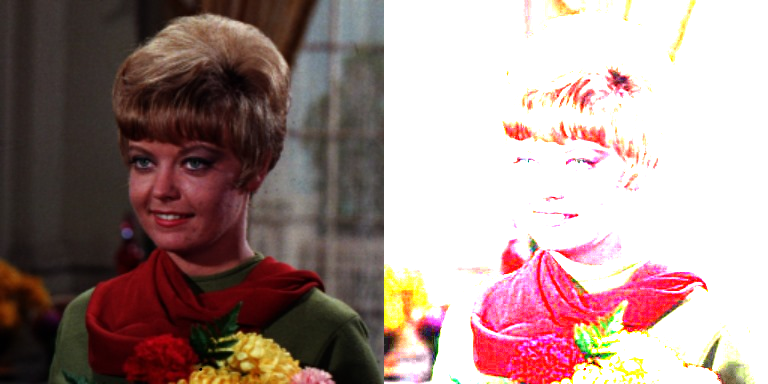

In [10]:
# kecerahan
print ('mengubah tingkat kecerahan')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

#kontras
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  contrast = float(input('masukkan nilai kontras : '))
except ValueError:
  print('error, not a number')

# mengubah kecerahana dan kontras berdasarkan inputan
fm = cv.imread('/content/drive/MyDrive/PCVK/images/woman.jpg')
adjusted_fm = cv.convertScaleAbs(fm, alpha=contrast, beta=brightness)

frame2 = cv.hconcat((fm, adjusted_fm))
cv2_imshow(frame2)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan: 40


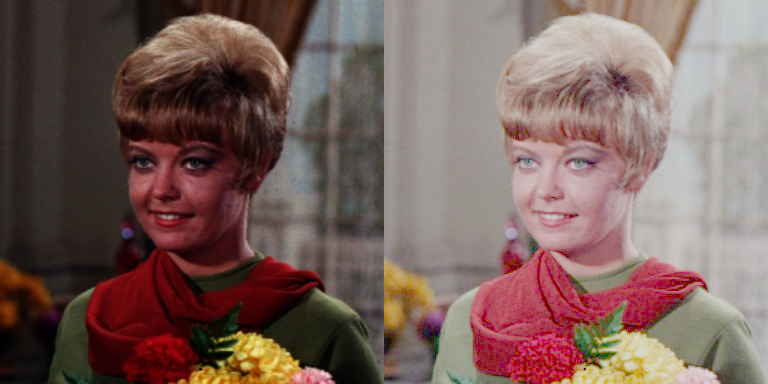

In [12]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

fm1 = cv.imread('/content/drive/MyDrive/PCVK/images/woman.jpg')
brightness_image = np.zeros(fm1.shape, fm1.dtype)

for y in range(fm1.shape[0]):
  for x in range(fm1.shape[1]):
    for c in range(fm1.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + fm1[y,x,c])), 0 , 255)

final_frame = cv.hconcat((fm1, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

- Averaging

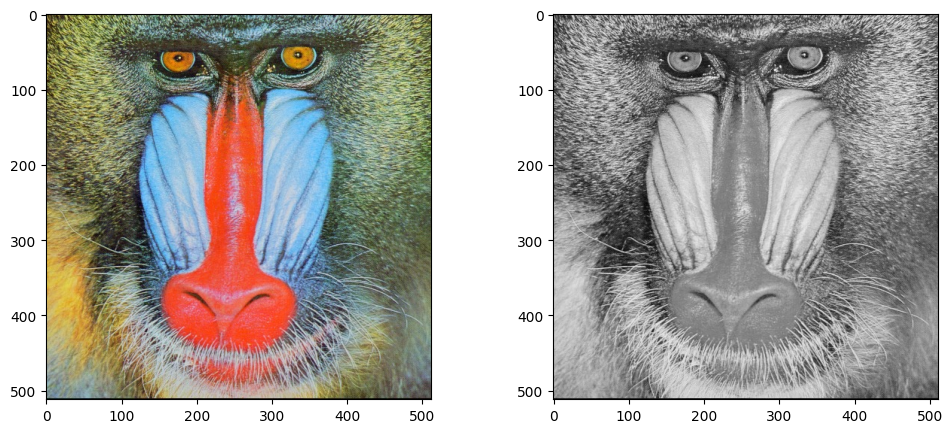

In [14]:
monki1a = cv.imread('/content/drive/MyDrive/PCVK/images/baboon.jpg')
grayscale_monki1a = cv.cvtColor(monki1a, cv.COLOR_BGR2GRAY)
fig, (original, gray_monki1a) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monki1a, cv.COLOR_BGR2RGB))
gray_monki1a.imshow(grayscale_monki1a, cmap='gray')

plt.show()

- Lightness

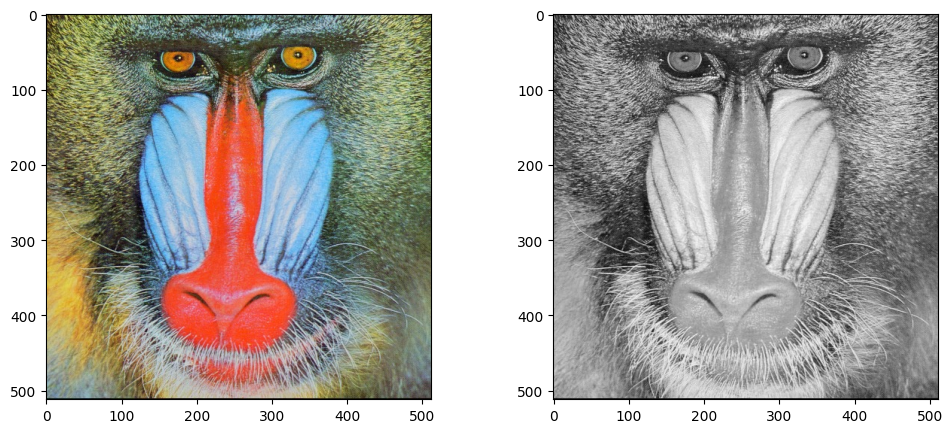

In [15]:
monki1b = cv.imread('/content/drive/MyDrive/PCVK/images/baboon.jpg')
hls_monki = cv.cvtColor(monki1b, cv.COLOR_BGR2HLS)
l_channel = hls_monki[:, :, 1]
fig, (original, ltmonki) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monki1b, cv.COLOR_BGR2RGB))
ltmonki.imshow(l_channel, cmap='gray')

plt.show()

- Luminance

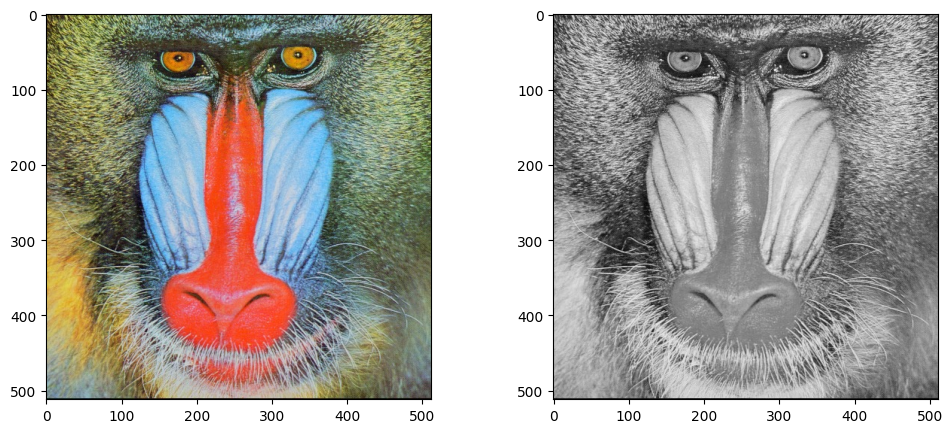

In [16]:
monki1c = cv.imread('/content/drive/MyDrive/PCVK/images/baboon.jpg')
yuv_monki = cv.cvtColor(monki1c, cv.COLOR_BGR2YUV)
y_channel = yuv_monki[:, :, 0]
fig, (original, lmmonki) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monki1c, cv.COLOR_BGR2RGB))
lmmonki.imshow(y_channel, cmap='gray')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

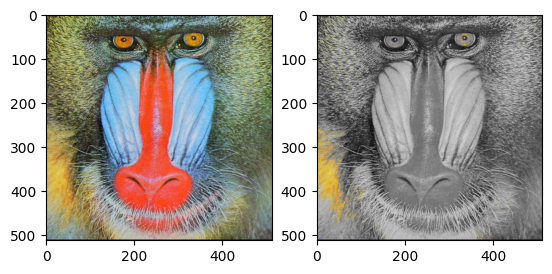

In [17]:
bro = cv.imread('/content/drive/MyDrive/PCVK/images/baboon.jpg')
bro_rgb = cv.cvtColor(bro, cv.COLOR_BGR2RGB)

lower_yellow = np.array([150, 150, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 100], dtype=np.uint8)
mask_yellow = cv.inRange(bro_rgb, lower_yellow, upper_yellow)

# invers mask kuning (kuning menjadi putih, latar belakang menjadi hitam)
mask_yellow_inv = cv.bitwise_not(mask_yellow)

# mengubah background menjadi gray
gray = cv.cvtColor(bro, cv.COLOR_BGR2GRAY)
bro = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar kuning dan background
out = cv.bitwise_and(bro_rgb, bro_rgb, mask=mask_yellow)
out_bg = cv.bitwise_and(bro, bro, mask=mask_yellow_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(bro_rgb)
ax[1].imshow(result)
plt.show()